In [1]:
from google.colab import drive
drive.mount('/content/drive')
caminho_drive = '/content/drive/My Drive/colab/NLP/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sentences = [['isso', 'é', 'um', 'curso', 'muito', 'bom', 'de', 'NLP'],
            ['isso', 'é', 'um', 'curso', 'NLP'],
            ['Word2Vec', 'NLP', 'texto'],
            ['palavra', 'embedding', 'NLP'],
            ['NLP', 'curso', 'Word2Vec', 'embedding'],
            ['cursos', 'NLP', 'são', 'legais'],
            ['disciplina', 'deep', 'NLP', 'excelente']]

In [4]:
model = Word2Vec(sentences, min_count=1)
print(model)

Word2Vec(vocab=18, size=100, alpha=0.025)


In [5]:
list(model.wv.vocab)

['isso',
 'é',
 'um',
 'curso',
 'muito',
 'bom',
 'de',
 'NLP',
 'Word2Vec',
 'texto',
 'palavra',
 'embedding',
 'cursos',
 'são',
 'legais',
 'disciplina',
 'deep',
 'excelente']

In [6]:
model['isso']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 2.9437644e-03, -4.4292537e-03,  2.9994373e-03, -4.8466711e-03,
        3.4115466e-03, -2.1423232e-03, -1.4379313e-03, -4.7551273e-04,
        4.4187331e-03, -2.5540646e-03,  2.8800431e-03,  1.1027703e-04,
        9.1060670e-04, -1.0564062e-03,  4.8185438e-03,  3.1742356e-03,
        1.0574700e-03, -2.2218858e-03, -3.4163266e-03,  4.6143807e-03,
        1.7577052e-03, -4.8408555e-03, -3.2014654e-03,  1.1080003e-03,
       -4.0648608e-03,  5.9149065e-04,  1.4124153e-03, -4.7684694e-03,
        1.2562046e-03,  1.7961087e-05,  5.5090047e-04,  2.4240988e-03,
       -2.0805933e-03, -4.1774693e-03, -4.2450638e-03, -4.0559946e-03,
       -4.4511701e-03, -4.4201468e-03,  2.9776779e-03, -4.2962730e-03,
        3.6308262e-03, -2.3499336e-03,  4.5913840e-03,  3.0973130e-03,
       -3.9730258e-03,  1.0818214e-03, -3.2780517e-03, -1.7729004e-04,
       -3.0056671e-03,  4.6368870e-03, -2.0901791e-03, -1.5083321e-03,
        6.8605097e-04, -4.3884860e-04,  4.0152655e-03, -4.7027235e-04,
      

In [7]:
model.most_similar( 'cursos' )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('excelente', 0.1137191653251648),
 ('bom', 0.10082967579364777),
 ('deep', 0.072421133518219),
 ('embedding', 0.05538754165172577),
 ('texto', 0.033829186111688614),
 ('NLP', -0.00018002837896347046),
 ('de', -0.025770938023924828),
 ('palavra', -0.03913131356239319),
 ('Word2Vec', -0.04256255179643631),
 ('legais', -0.055140696465969086)]

#Visualização

In [8]:
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [9]:
X.shape

(18, 100)

In [10]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

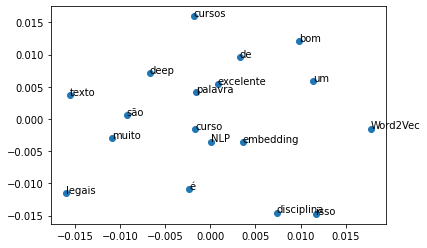

In [11]:
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

#Carregando modelo NILC

http://www.nilc.icmc.usp.br/embeddings

In [15]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format( caminho_drive + 'cbow_s100.txt' )

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [16]:
model.most_similar( 'um' )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('aquele', 0.700981080532074),
 ('\x93um', 0.6995958089828491),
 ('\u200b\u200bum', 0.6981390714645386),
 ('«um', 0.6852110028266907),
 ('esse', 0.6715439558029175),
 ('o', 0.6603140830993652),
 ('úm', 0.6545041799545288),
 ('igualmenteum', 0.6494402289390564),
 ('nenhum', 0.6479946374893188),
 ('lusaum', 0.6372602581977844)]

In [17]:
model.most_similar( 'dois' )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('três', 0.8419844508171082),
 ('quatro', 0.820443868637085),
 ('cinco', 0.806233286857605),
 ('seis', 0.8033179044723511),
 ('oito', 0.8033105731010437),
 ('sete', 0.7971540093421936),
 ('quatros', 0.78400719165802),
 ('nove', 0.7836145162582397),
 ('dez', 0.7832129597663879),
 ('onze', 0.7791332006454468)]

In [18]:
model.most_similar( 'puta' )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cachorra', 0.6375849843025208),
 ('tarada', 0.5960276126861572),
 ('quenga', 0.5869368314743042),
 ('besta', 0.5798031687736511),
 ('porra', 0.5741931200027466),
 ('vadia', 0.5711554288864136),
 ('mamã£.', 0.5686336755752563),
 ('lesma', 0.5641306638717651),
 ('sanguessuga', 0.5635169744491577),
 ('sapatão', 0.5632981061935425)]

In [19]:
model.most_similar( positive=[ 'homem', 'ladrão' ] )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('rapaz', 0.9090147018432617),
 ('bandido', 0.8781195878982544),
 ('assaltante', 0.8662614822387695),
 ('garoto', 0.830012321472168),
 ('taxista', 0.8289758563041687),
 ('cão', 0.8237225413322449),
 ('atirador', 0.8226835131645203),
 ('mendigo', 0.8156789541244507),
 ('ogro', 0.814790666103363),
 ('menino', 0.8118487596511841)]

In [20]:
model.most_similar( positive=[ 'mulher', 'rei' ], negative=[ 'homem' ] )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('esposa', 0.688875675201416),
 ('filha', 0.6741011142730713),
 ('governanta', 0.6724554896354675),
 ('sobrinha', 0.669994056224823),
 ('madrasta', 0.6670832633972168),
 ('concubina', 0.6659663915634155),
 ('dama-de-companhia', 0.6614803075790405),
 ('benção', 0.659320056438446),
 ('múmia', 0.6535747051239014),
 ('bênção', 0.6500141620635986)]

In [21]:
model.most_similar( positive=[ 'homem', 'sexo', 'mulher' ] )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('adolescente', 0.7359200119972229),
 ('travesti', 0.6946176290512085),
 ('amante', 0.6931555271148682),
 ('garoto', 0.6765562295913696),
 ('toxicodependente', 0.6692215204238892),
 ('rapaz', 0.6656990051269531),
 ('carcereiro', 0.6603147983551025),
 ('indivíduo', 0.6593289375305176),
 ('delinquente', 0.658284068107605),
 ('abusador', 0.6579267382621765)]

In [23]:
model.most_similar( positive=[ 'homem', 'sexo' ] )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('indivíduo', 0.7480214834213257),
 ('delinquente', 0.743060827255249),
 ('estereótipo', 0.7329531908035278),
 ('rapaz', 0.7304186224937439),
 ('garoto', 0.7182210683822632),
 ('agressor', 0.7025691270828247),
 ('abusador', 0.7016667127609253),
 ('assassino', 0.6969007849693298),
 ('menino', 0.6949894428253174),
 ('devaneio', 0.6884657144546509)]

In [24]:
model.most_similar( positive=[ 'mulher', 'gay' ] )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cafetina', 0.739840030670166),
 ('garota', 0.7370715737342834),
 ('prostituta', 0.7301627397537231),
 ('stripper', 0.7103753685951233),
 ('lésbica', 0.700650691986084),
 ('bruxa', 0.6903043389320374),
 ('cachorra', 0.6830947399139404),
 ('rapariga', 0.6784197092056274),
 ('menina', 0.6718288660049438),
 ('garçonete', 0.6716513633728027)]

In [29]:
model.most_similar( 'deus' )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('satanás', 0.707493007183075),
 ('alá', 0.6760026216506958),
 ('tupá', 0.6731401681900024),
 ('cristo', 0.6705402135848999),
 ('cardênio', 0.6607985496520996),
 ('dioniso', 0.6599113345146179),
 ('amor', 0.6591964960098267),
 ('javé', 0.6569312810897827),
 ('esculápio', 0.6446376442909241),
 ('sacrifício', 0.6418895721435547)]